In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\GAURAV\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [5]:
import pandas as pd

In [7]:
books = pd.read_csv(f"{path}/books.csv")

In [13]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


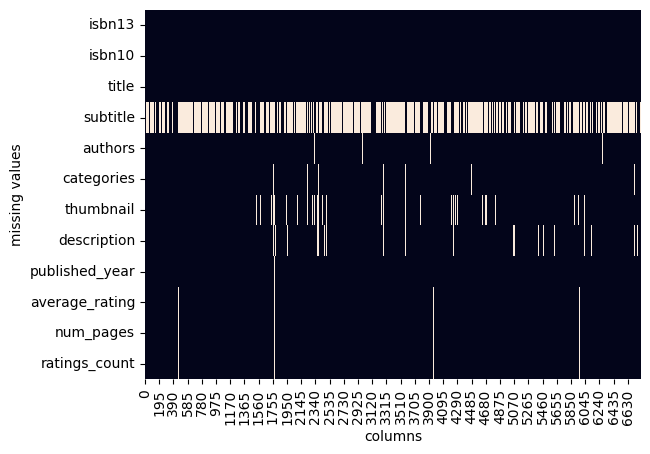

In [18]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax, cbar=False)
plt.xlabel("columns")
plt.ylabel("missing values")
plt.show()

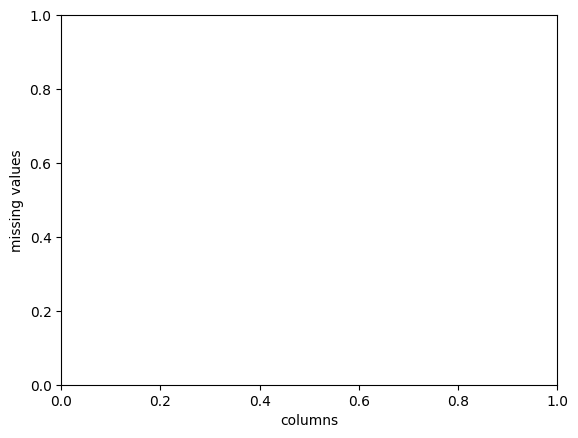

In [22]:
import numpy as np
books['missing_description'] = np.where(books['description'].isna(),1,0)
books['age_of_the_book'] = 2025- books['published_year']

In [23]:
columns_of_interest =['num_pages',"age_of_the_book",'missing_description','average_rating']
books[columns_of_interest]

,num_pages,age_of_the_book,missing_description,average_rating
0,247.0,21.0,0,3.85
1,241.0,25.0,0,3.83
2,479.0,43.0,0,3.97
3,512.0,32.0,0,3.93
4,170.0,23.0,0,4.15
...,...,...,...,...
6805,531.0,26.0,0,4.51
6806,74.0,32.0,1,4.08
6807,186.0,21.0,1,3.98
6808,210.0,44.0,0,0.00
